In [22]:
import json
from matplotlib import pyplot as plt

In [5]:
with open('data/workflows/cs-vqe-test-3yge1-r000_workflow_result.json', 'r') as json_file:
    data = (json.load(json_file))

In [27]:
X=[]
Y=[]
P1=[]
P2=[]
P3=[]
P4=[]

for i in data["cs-vqe-test-3yge1-r000-4116107011"]['optimization-results']['history']:
    P1.append(i['params']['real'][0])
    P2.append(i['params']['real'][1])
    P3.append(i['params']['real'][2])
    P4.append(i['params']['real'][3])
    X.append(i['call_number'])
    Y.append(i['value']['value'])

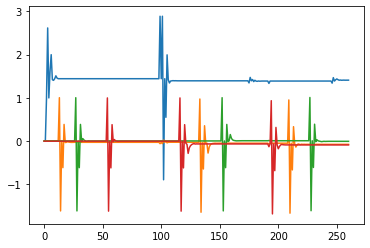

In [28]:
plt.plot(X, P1)
plt.plot(X, P2)
plt.plot(X, P3)
plt.plot(X, P4)

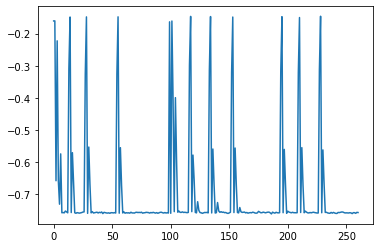

In [29]:
plt.plot(X, Y)